In [3]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
import pandas as pd

houses_full=pd.read_csv('Melbourne_housing_FULL.csv')
houses=houses_full.dropna()
houses=houses.loc[houses['BuildingArea']<1500]
houses=houses.sample(1000,random_state=123)

houses.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11039,Brunswick East,10 Harrison St,3,h,1310000.0,S,Nelson,3/12/2016,4.5,3057.0,...,1.0,2.0,456.0,144.0,1950.0,Moreland City Council,-37.7638,144.9804,Northern Metropolitan,5533.0
9984,Sunshine West,8a Glengala Rd,3,h,622500.0,S,Douglas,24/09/2016,13.5,3020.0,...,1.0,1.0,534.0,131.0,1970.0,Brimbank City Council,-37.7887,144.8231,Western Metropolitan,6763.0
8259,Preston,22/2 Arthur St,1,u,300000.0,PI,Nelson,24/09/2016,8.8,3072.0,...,1.0,1.0,0.0,67.0,2005.0,Darebin City Council,-37.7441,144.9999,Northern Metropolitan,14577.0
9156,South Melbourne,50 Bridport St,2,h,2000000.0,PI,Greg,16/04/2016,2.1,3205.0,...,2.0,1.0,141.0,150.0,1900.0,Port Phillip City Council,-37.8389,144.9612,Southern Metropolitan,5943.0
6567,Maribyrnong,104/5 Ordnance Res,2,u,400000.0,SP,Biggin,12/11/2016,8.7,3032.0,...,1.0,2.0,3967.0,87.0,2007.0,Maribyrnong City Council,-37.7706,144.8805,Western Metropolitan,4918.0


(1000,)

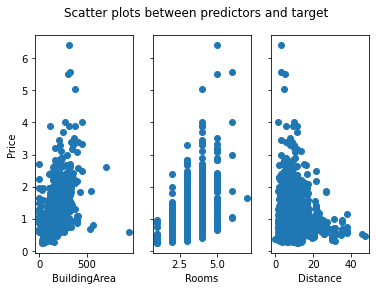

In [4]:
# separate the predictors as x
# transform the data frame into an numpy array
# this will facilitate slicing for plotting and ML
predictors=['BuildingArea','Rooms','Distance']
x=np.array(houses.loc[:,predictors])
y=np.array(houses.loc[:,'Price'])

def priceshrink(v,t):
    return int(v/1000000)

fig, sc = plt.subplots(1,len(predictors))
fig.suptitle('Scatter plots between predictors and target')
for i in range(len(predictors)):
    sc[i].scatter(x[:,i], y)
    sc[i].set(xlabel=predictors[i])
    sc[i].yaxis.set_major_formatter(plt.NullFormatter())
sc[0].set(ylabel='Price')
sc[0].yaxis.set_major_formatter(plt.FuncFormatter(priceshrink))
np.shape(y)

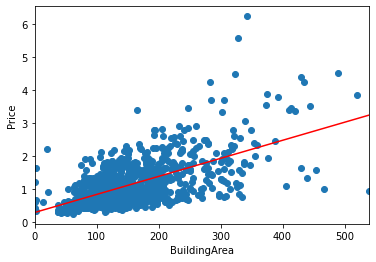

In [112]:
model = LinearRegression(fit_intercept=True)


model.fit(x[:,0:1], y)

xfit = np.linspace(0, max(x[:,0]), 1000)
# newaxis gives xfit the shape of a matrix
yfit = model.predict(xfit[:,np.newaxis])

# the building of the plot starts by defining an axes
# then you put the scatter plot on the axes
# you set a number of things on the axes
# etc.
# the build of the plot is axes centered
ax=plt.axes(label='lrfit')
ax.scatter(x[:,0], y)
ax.set_ylabel('Price')
ax.set_xlabel('BuildingArea')
ax.set_xlim(left=0)
ax.set_xlim(left=0,right=max(x[:,0]))
ax.yaxis.set_major_formatter(plt.FuncFormatter(priceshrink))
ax.plot(xfit, yfit,color='red')


In [98]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     5487.962267597321
Model intercept: 283793.64117072534


In [105]:
print("Model R2:    ", model.score(x[:,0:1],y))

Model R2:     0.38645218072864085


In [113]:
model.fit(x, y)
print("Predictors:",predictors)
print("Coefficients (alphas):    ", model.coef_)
print("Model intercept:", model.intercept_)
print("Model R2:    ", model.score(x,y))

Predictors: ['BuildingArea', 'Rooms', 'Distance']
Coefficients (alphas):     [  5096.81698113  85404.64073188 -36513.48538364]
Model intercept: 482938.626092975
Model R2:     0.5021785990606764


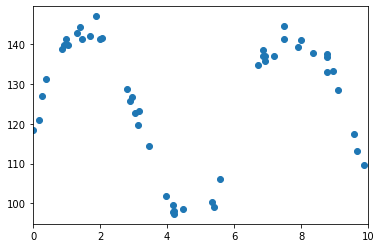

In [133]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = (np.sin(x) + 0.1 * rng.randn(50) +5)*24

ax=plt.axes(label='lrknn')
ax.set_xlim(0,10)
ax.scatter(x, y)


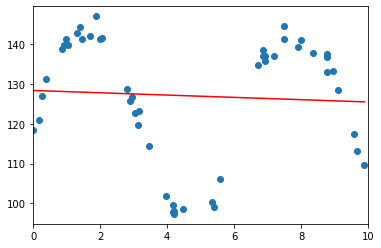

In [134]:
model.fit(x[:,np.newaxis],y[:,np.newaxis])
xfit = np.linspace(0, max(x), 1000)
# newaxis gives xfit the shape of a matrix
yfit = model.predict(xfit[:,np.newaxis])

ax=plt.axes(label='lrknn')
ax.set_xlim(0,10)
ax.scatter(x, y)
ax.plot(xfit, yfit,color='red')


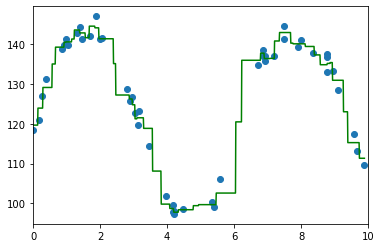

In [135]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x[:,np.newaxis], y)
yfitn=neigh.predict(xfit[:,np.newaxis])

ax=plt.axes(label='lrknn')
ax.set_xlim(0,10)
ax.scatter(x, y)
ax.plot(xfit, yfitn,color='green')
